In [34]:
# Import necessary libraries
import seaborn as sns  # For data visualization using Seaborn
import pandas as pd    # For data manipulation and analysis
import numpy as np     # For numerical operations
import matplotlib.pyplot as plt  # For plotting

# Import ARIMA-related modules from statsmodels
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller  # For Augmented Dickey-Fuller test
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf  # For plotting ACF and PACF

# Load the Airline Passengers dataset from seaborn
df = sns.load_dataset('flights')

In [35]:
df

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [46]:
# Filter for only January entries
january_data = df[df['month'] == 'Jan']

# Group by operation for January of every year
grouped_january = january_data.groupby(['year']).sum()
print("Jan Data:")
print(grouped_january)
print()

Jan Data:
      passengers
year            
1949         112
1950         115
1951         145
1952         171
1953         196
1954         204
1955         242
1956         284
1957         315
1958         340
1959         360
1960         417



C:\Temp\ipykernel_17884\2675932307.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_january = january_data.groupby(['year']).sum()


In [43]:
# Filter for only April entries
april_data = df[df['month'] == 'Apr']

# Group by operation for April of every year
grouped_april = april_data.groupby(['year']).sum()

print("April Data:")
print(grouped_april)
print()

April Data:
      passengers
year            
1949         129
1950         135
1951         163
1952         181
1953         235
1954         227
1955         269
1956         313
1957         348
1958         348
1959         396
1960         461



C:\Temp\ipykernel_17884\2086795133.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_april = april_data.groupby(['year']).sum()


In [44]:
# Filter for only July entries
july_data = df[df['month'] == 'Jul']

# Group by operation for July of every year
grouped_july = july_data.groupby(['year']).sum()

print("July Data:")
print(grouped_july)
print()

July Data:
      passengers
year            
1949         148
1950         170
1951         199
1952         230
1953         264
1954         302
1955         364
1956         413
1957         465
1958         491
1959         548
1960         622



C:\Temp\ipykernel_17884\3008897494.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_july = july_data.groupby(['year']).sum()


In [45]:
# Filter for only October entries
october_data = df[df['month'] == 'Oct']

# Group by operation for October of every year
grouped_october = october_data.groupby(['year']).sum()

print("October Data:")
print(grouped_october)


October Data:
      passengers
year            
1949         119
1950         133
1951         162
1952         191
1953         211
1954         229
1955         274
1956         306
1957         347
1958         359
1959         407
1960         461


C:\Temp\ipykernel_17884\2755484024.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_october = october_data.groupby(['year']).sum()


# Time Series Visualization 

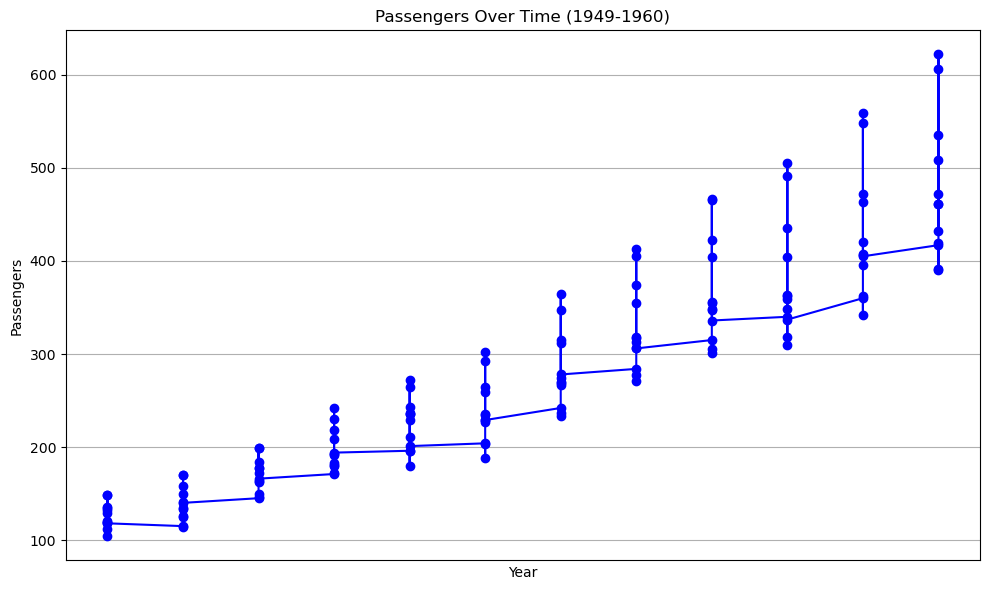

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(df['year'], df['passengers'], marker='o', color='blue', linestyle='-')

# Adding title and labels
plt.title('Passengers Over Time (1949-1960)')
plt.xlabel('Year')
plt.ylabel('Passengers')
plt.grid(True)
plt.tight_layout()
plt.show()

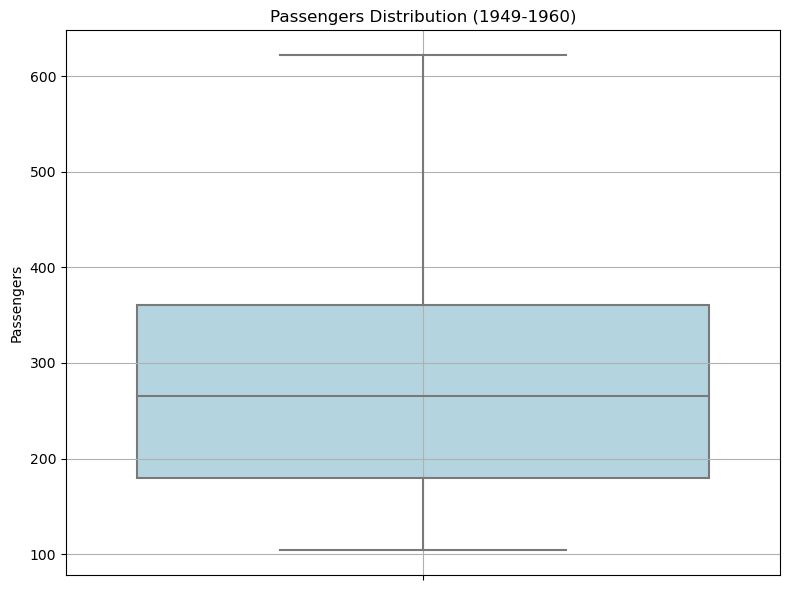

In [10]:
import seaborn as sns

# Create box plot to show passengers distribution
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['passengers'], color='lightblue')
plt.title('Passengers Distribution (1949-1960)')
plt.ylabel('Passengers')
plt.grid(True)
plt.tight_layout()
plt.show()


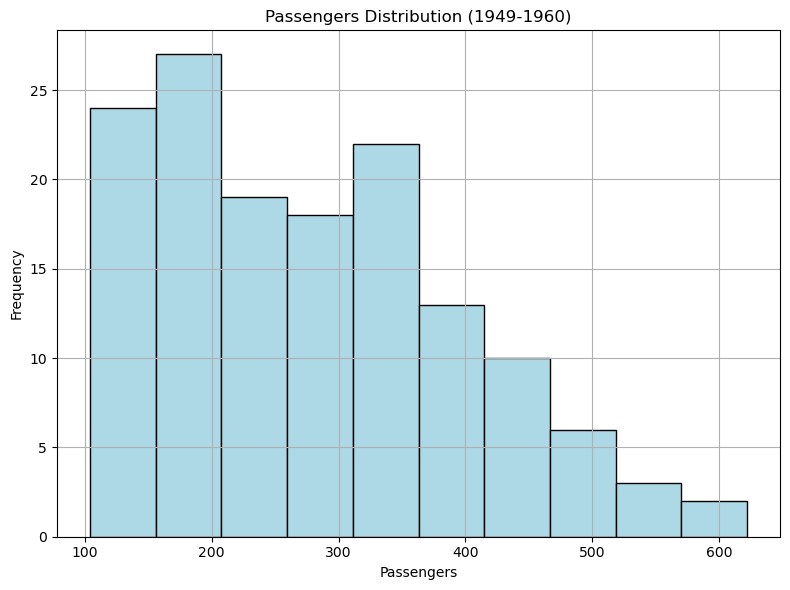

In [11]:
import matplotlib.pyplot as plt

# Plot histogram for passengers distribution
plt.figure(figsize=(8, 6))
plt.hist(df['passengers'], bins=10, color='lightblue', edgecolor='black')
plt.title('Passengers Distribution (1949-1960)')
plt.xlabel('Passengers')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


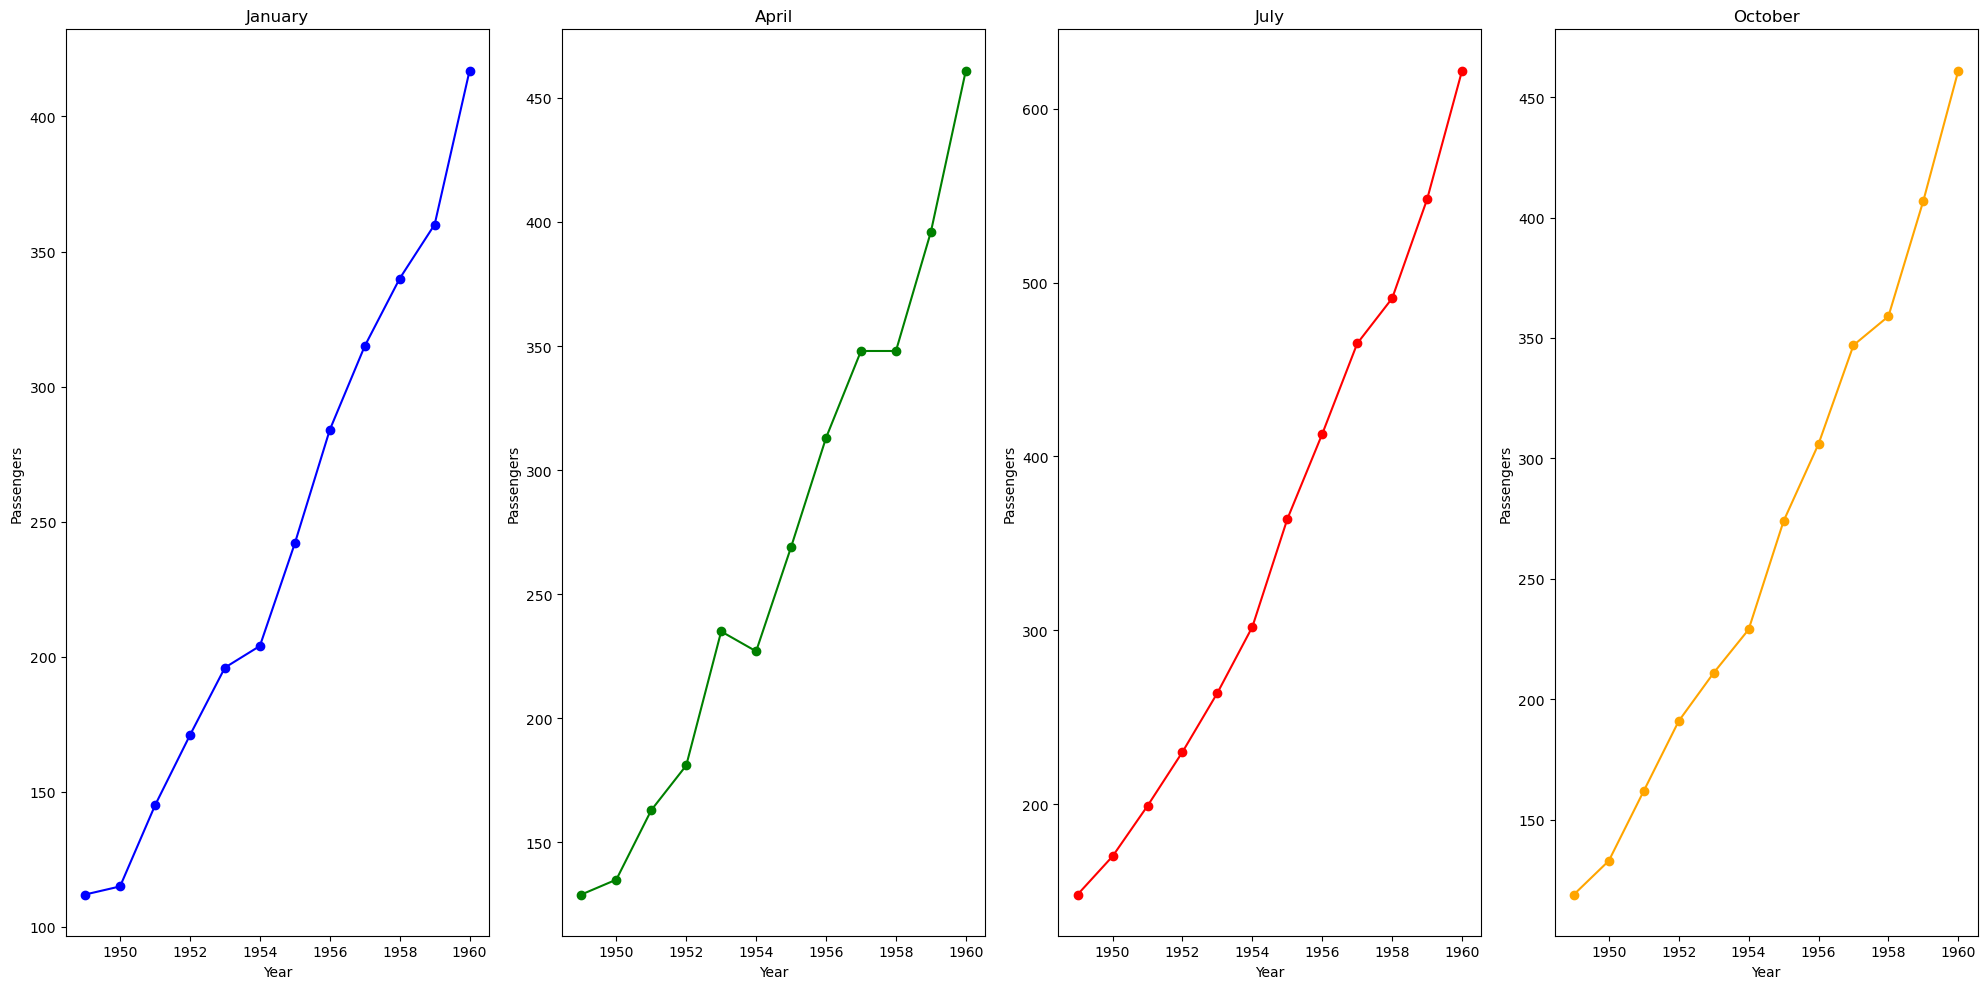

In [61]:
import matplotlib.pyplot as plt

# Create a figure and axes for subplots
fig, axs = plt.subplots(1, 4, figsize=(20, 10))

# Plot January data
axs[0].plot(grouped_january.index, grouped_january['passengers'], marker='o', color='blue')
axs[0].set_title('January')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Passengers')

# Plot April data
axs[1].plot(grouped_april.index, grouped_april['passengers'], marker='o', color='green')
axs[1].set_title('April')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Passengers')

# Plot July data
axs[2].plot(grouped_july.index, grouped_july['passengers'], marker='o', color='red')
axs[2].set_title('July')
axs[2].set_xlabel('Year')
axs[2].set_ylabel('Passengers')

# Plot October data
axs[3].plot(grouped_october.index, grouped_october['passengers'], marker='o', color='orange')
axs[3].set_title('October')
axs[3].set_xlabel('Year')
axs[3].set_ylabel('Passengers')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [3]:

# Test for stationarity
def test_stationarity(timeseries):
    result = adfuller(timeseries, autolag='AIC')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])

    if result[1] <= 0.05:
        print("Stationary (reject the null hypothesis)")
    else:
        print("Non-Stationary (fail to reject the null hypothesis)")

# Test for stationarity of the original time series
test_stationarity(timeseries)

# Differencing to make the time series stationary
differenced_series = timeseries.diff().dropna()

# Test for stationarity after differencing
test_stationarity(differenced_series)



NameError: name 'timeseries' is not defined

In [4]:
# Plot ACF and PACF to determine p and q values for ARIMA
plot_acf(differenced_series)
plt.title('Autocorrelation Function (ACF)')
plt.show()

plot_pacf(differenced_series)
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

# Fit ARIMA model
order = (1, 1, 1)  # You can adjust these values based on ACF and PACF analysis
model = ARIMA(timeseries, order=order)
results = model.fit()

# Summary of the ARIMA model
print(results.summary())



NameError: name 'differenced_series' is not defined

In [5]:
 #Plot the residuals
results.plot_diagnostics(figsize=(15, 10))
plt.show()

# Forecast future values
forecast_steps = 12  # You can adjust the number of steps to forecast
forecast = results.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(timeseries.index[-1], periods=forecast_steps + 1, freq='M')[1:]
forecast_values = forecast.predicted_mean

# Plot the original time series and the forecasted values
plt.plot(timeseries, label='Original Time Series')
plt.plot(forecast_index, forecast_values, color='red', label='Forecasted Values')
plt.title('ARIMA Forecasting')
plt.legend()

NameError: name 'results' is not defined